# Drinking water filtration recommendation by region

The objective is to recommend one of four types of filters based on recorded contaminants and water qualities:

1. Activated Carbon Filter
2. Ion Exchange
3. Distillation
4. Reverse Osmosis

note: Orange County and San Diego recommendations are not available in the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix, roc_curve, auc, precision_score, recall_score, accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


import sys
import six
sys.modules['sklearn.externals.six'] = six
from imblearn.over_sampling import SMOTE

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

base = pd.read_csv('base.csv')
base.head()

,SAMPLE_YEAR,MCL,filters,Superior_California,North_Coast,San_Francisco,Northern_San_Joaquin_Valley,Central_Coast,Southern_San_Joaquin_Valley,Inland_Empire,Los_Angeles,"1,1-Dichloroethane","1,1,1-Trichloroethane","1,1,2-Trichloroethane","1,1,2,2-Tetrachloroethane","1,2-Dibromo-3-chloropropane (DBCP)","1,2-Dichlorobenzene","1,2-Dichloroethane","1,2-Dichloropropane","1,2,3-Trichloropropane","1,2,4-Trichlorobenzene","1,4-Dichlorobenzene","2,4,5-TP (Silvex)",Alachlor,Aluminum,Antimony,Arsenic,Atrazine,Barium,Benzene,Beryllium,BHC-gamma (Lindane),Cadmium,Carbofuran,Carbon tetrachloride,Chlordane,Chromium,"cis-1,3-Dichloropropene",Copper,Dinoseb (DNPB),Endrin,Fluoride,Glyphosate,Heptachlor,Heptachlor epoxide,Lead,Mercury,Methoxychlor,Molinate,Nickel,Nitrate,Nitrate + Nitrite,Nitrite,Oxamyl,Pentachlorophenol (PCP),Picloram,Selenium,Simazine,Strontium,Styrene,Thallium,Thiobencarb,Toluene,Toxaphene,"trans-1,3-Dichloropropene",Trichlorofluoromethane,Vinyl chloride,Groundwater,Other,Surface Water
0,2016,0.2,Activated Carbon Filter,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1
1,2012,0.2,Activated Carbon Filter,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1
2,2016,0.2,Activated Carbon Filter,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1
3,2019,0.2,Activated Carbon Filter,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1
4,2012,0.2,Activated Carbon Filter,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1


In [2]:
# set target filter type by number
conditions = [((base['filters'] == 'Activated Carbon Filter')),
              ((base['filters'] == 'Ion Exchange')),
              ((base['filters'] == 'Distillation')),
              ((base['filters'] == 'Reverse Osmosis'))]
choices = [1,2,3,4]
#len(conditions)
base['filters'] = np.select(conditions, choices, default=0)

In [3]:
base = base.drop('SAMPLE_YEAR', axis=1)
cats = base.filter(['Superior_California', 'North_Coast', 'San_Francisco', 
            'Northern_San_Joaquin_Valley', 'Central_Coast', 'Southern_San_Joaquin_Valley', 
            'Inland_Empire', 'Los_Angeles','Groundwater','Other','Surface Water'])
conts = base.drop(cats, axis=1)
conts = conts.drop('filters', axis=1)

y = base['filters']
x = pd.concat([cats,conts], axis = 1)

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=13)

## KNN

In [5]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9046751448456801


                         precision    recall  f1-score   support

Activated Carbon Filter       0.92      0.96      0.94     20426
           Ion Exchange       0.43      0.36      0.40       755
           Distillation       0.96      0.87      0.91      5538
        Reverse Osmosis       0.19      0.12      0.15       724

               accuracy                           0.90     27443
              macro avg       0.63      0.58      0.60     27443
           weighted avg       0.90      0.90      0.90     27443



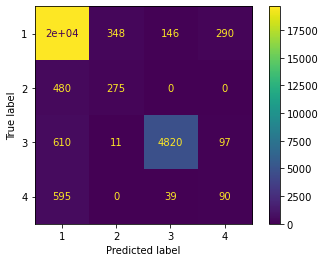

In [6]:
print(classification_report(y_test, knn.predict(X_test), target_names=['Activated Carbon Filter',
                                                               'Ion Exchange', 
                                                               'Distillation',
                                                               'Reverse Osmosis']))
plot_confusion_matrix(knn, X_test, y_test)

notes:

## Decision Tree

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9168822650584849


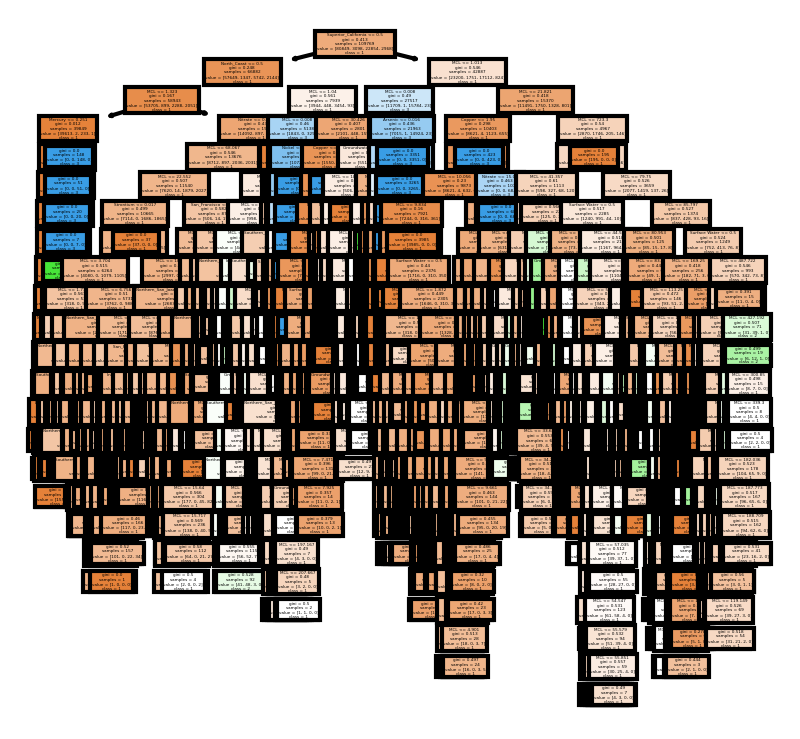

In [8]:
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (3,3), dpi=300)
tree.plot_tree(clf,
               feature_names = x.columns, 
               class_names=np.unique(y).astype('str'),
               filled = True)
plt.show()

In [9]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=['Activated Carbon Filter',
                                                               'Ion Exchange', 
                                                               'Distillation',
                                                               'Reverse Osmosis']))

[[19958   291     2     8]
 [  567   221     0     0]
 [  715    10  4969     2]
 [  686     0     0    14]]
                         precision    recall  f1-score   support

Activated Carbon Filter       0.91      0.99      0.95     20259
           Ion Exchange       0.42      0.28      0.34       788
           Distillation       1.00      0.87      0.93      5696
        Reverse Osmosis       0.58      0.02      0.04       700

               accuracy                           0.92     27443
              macro avg       0.73      0.54      0.56     27443
           weighted avg       0.91      0.92      0.90     27443



In [10]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.15982217687570602
Mean Squared Error: 0.3638086215063951
Root Mean Squared Error: 0.6031655009252395


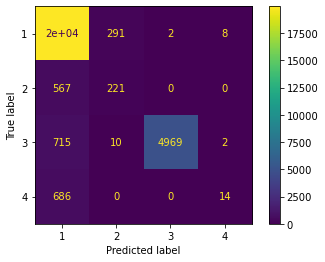

In [11]:
plot_confusion_matrix(clf, X_test, y_test)

### prune

In [12]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.812192544546879


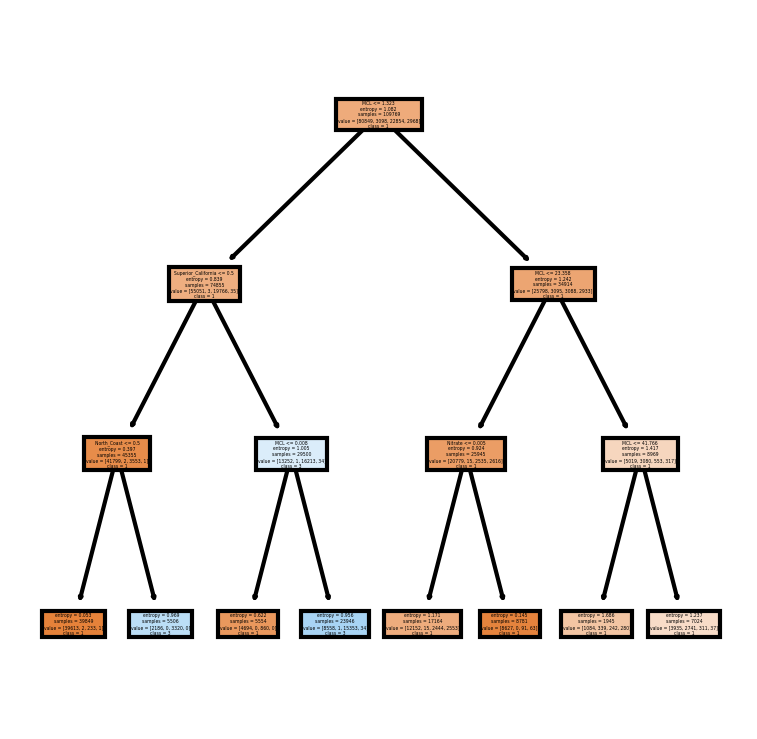

In [13]:
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (3,3), dpi=300)
tree.plot_tree(clf,
               feature_names = x.columns, 
               class_names=np.unique(y).astype('str'),
               filled = True)
plt.show()

In [14]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=['Activated Carbon Filter',
                                                               'Ion Exchange', 
                                                               'Distillation',
                                                               'Reverse Osmosis']))

[[17577     0  2682     0]
 [  787     0     1     0]
 [  984     0  4712     0]
 [  695     0     5     0]]
                         precision    recall  f1-score   support

Activated Carbon Filter       0.88      0.87      0.87     20259
           Ion Exchange       0.00      0.00      0.00       788
           Distillation       0.64      0.83      0.72      5696
        Reverse Osmosis       0.00      0.00      0.00       700

               accuracy                           0.81     27443
              macro avg       0.38      0.42      0.40     27443
           weighted avg       0.78      0.81      0.79     27443



/Users/kathanner/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.37204387275443646
Mean Squared Error: 0.7911671464490034
Root Mean Squared Error: 0.8894757705800667


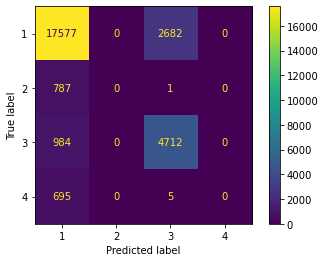

In [16]:
plot_confusion_matrix(clf, X_test, y_test)

notes:

## Random Forest

In [17]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
forest = Pipeline([('ss', StandardScaler()), 
                   ('forest', RandomForestClassifier(
                     n_estimators=150, 
                     max_depth= 20,
                     min_samples_leaf = 1, 
                     random_state = 123))])

forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9175746091899574


                         precision    recall  f1-score   support

Activated Carbon Filter       0.90      1.00      0.95     20256
           Ion Exchange       0.47      0.05      0.09       773
           Distillation       1.00      0.87      0.93      5650
        Reverse Osmosis       0.90      0.02      0.05       764

               accuracy                           0.92     27443
              macro avg       0.82      0.49      0.50     27443
           weighted avg       0.91      0.92      0.89     27443



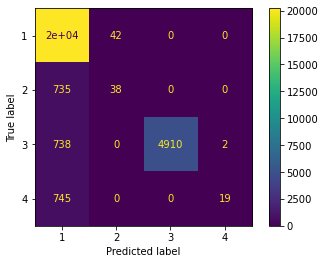

In [18]:
print(classification_report(y_test, forest.predict(X_test), target_names=['Activated Carbon Filter',
                                                               'Ion Exchange', 
                                                               'Distillation',
                                                               'Reverse Osmosis']))
plot_confusion_matrix(forest, X_test, y_test)

### smote

In [19]:
X_train_resampled, y_train_resampled = SMOTE(random_state=13).fit_sample(X_train, y_train) 

In [20]:
forest = Pipeline([('ss', StandardScaler()), 
                   ('forest', RandomForestClassifier(
                     n_estimators=150, 
                     max_depth= 20,
                     min_samples_leaf = 1, 
                     random_state = 13))])
y_pred = forest.predict(X_test)
forest.fit(X_train_resampled, y_train_resampled)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9175746091899574


                         precision    recall  f1-score   support

Activated Carbon Filter       1.00      0.82      0.90     20256
           Ion Exchange       0.42      0.97      0.59       773
           Distillation       1.00      0.87      0.93      5650
        Reverse Osmosis       0.18      0.97      0.31       764

               accuracy                           0.84     27443
              macro avg       0.65      0.91      0.68     27443
           weighted avg       0.96      0.84      0.88     27443



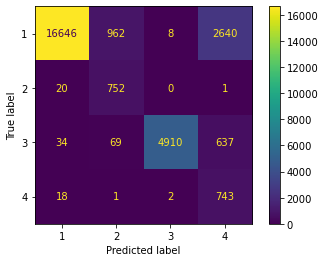

In [21]:
print(classification_report(y_test, forest.predict(X_test), target_names=['Activated Carbon Filter',
                                                               'Ion Exchange', 
                                                               'Distillation',
                                                               'Reverse Osmosis']))
plot_confusion_matrix(forest, X_test, y_test)

notes: this is the best model for true positives